# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load dataset
file_path = 'Balanced_Household_Transactions.xlsx'
df = pd.read_excel(file_path)

# Separate features and target variable
X = df.drop(columns=['Category'])
y = df['Category']

# Check the distribution of your target variable 'Category'
print(y.value_counts())

Category
FOOD              597
HEALTH            597
OTHER             597
DRINKS            597
FOOD & DINING     597
HOUSEHOLD         597
TRANSPORTATION    597
GROCERIES         597
FAMILY            597
SUBSCRIPTION      597
APPAREL           597
EDUCATION         597
GROCERY           597
FESTIVALS         597
UTILITIES         597
BEAUTY            597
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer

# Load datasets
train_data = pd.read_excel("Training_Datasets.xlsx")
test_data = pd.read_excel("Testing_Datasets.xlsx")

# Feature Engineering
def preprocess_data_aligned(train_df, test_df):
    # Extract date components
    for df in [train_df, test_df]:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['DayOfWeek'] = df['Date'].dt.dayofweek

    # Transform textual features using TF-IDF
    tfidf = TfidfVectorizer(max_features=100)
    tfidf_train = tfidf.fit_transform(train_df['Noted'].fillna('')).toarray()
    tfidf_test = tfidf.transform(test_df['Noted'].fillna('')).toarray()

    tfidf_train_df = pd.DataFrame(tfidf_train, columns=[f"TFIDF_{i}" for i in range(tfidf_train.shape[1])])
    tfidf_test_df = pd.DataFrame(tfidf_test, columns=[f"TFIDF_{i}" for i in range(tfidf_test.shape[1])])

    # One-hot encode categorical columns
    categorical_train = pd.get_dummies(train_df[['Transaction Type', 'Payment Method']])
    categorical_test = pd.get_dummies(test_df[['Transaction Type', 'Payment Method']])

    # Align columns
    categorical_train, categorical_test = categorical_train.align(categorical_test, join='outer', axis=1, fill_value=0)

    # Combine features
    numerical_train = train_df[['Amount', 'Year', 'Month', 'DayOfWeek']]
    numerical_test = test_df[['Amount', 'Year', 'Month', 'DayOfWeek']]

    train_combined = pd.concat([numerical_train, categorical_train, tfidf_train_df], axis=1)
    test_combined = pd.concat([numerical_test, categorical_test, tfidf_test_df], axis=1)

    return train_combined, test_combined

# Preprocess training and testing datasets
X_train_full, X_test_full = preprocess_data_aligned(train_data, test_data)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Encode target variable
le_category = LabelEncoder()
y_train = le_category.fit_transform(train_data['Category'])
y_test = le_category.transform(test_data['Category'])

# Convert target to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Define Neural Network
model = Sequential([
    Dense(1024, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(y_train_onehot.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_scaled, y_train_onehot,
    epochs=300,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_onehot, verbose=0)

# Print results
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

KeyboardInterrupt: 

In [ ]:
file_path = 'Training_Datasets.xlsx'
df = pd.read_excel(file_path)
category_counts = df['Category'].value_counts()

category_counts

,count
Category,
GROCERY,478
APPAREL,478
BEAUTY,478
GROCERIES,478
SUBSCRIPTION,478
DRINKS,478
FESTIVALS,478
TRANSPORTATION,478
HOUSEHOLD,478


In [ ]:
file_path = 'Testing_Datasets.xlsx'
df = pd.read_excel(file_path)
category_counts = df['Category'].value_counts()

category_counts

,count
Category,
FAMILY,120
UTILITIES,120
EDUCATION,120
FOOD,120
OTHER,120
HEALTH,120
FOOD & DINING,120
BEAUTY,119
TRANSPORTATION,119


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1665 - loss: 3.0729 - val_accuracy: 0.3891 - val_loss: 2.3211
Epoch 2/500
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3569 - loss: 2.4158 - val_accuracy: 0.4572 - val_loss: 2.1125
Epoch 3/500
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4335 - loss: 2.1469 - val_accuracy: 0.4833 - val_loss: 1.9813
Epoch 4/500
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4519 - loss: 2.0401 - val_accuracy: 0.5134 - val_loss: 1.8775
Epoch 5/500
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4741 - loss: 1.9207 - val_accuracy: 0.5356 - val_loss: 1.7768
Epoch 6/500
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5083 - loss: 1.8342 - val_accuracy: 0.5598 - val_loss: 1.7083
Epoch 7/500
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5124 - loss: 1.7833 - val_accuracy: 0.5749 - val_loss: 1.6341
Epoch 8/500
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5404 - loss: 1.7132 - val_accu

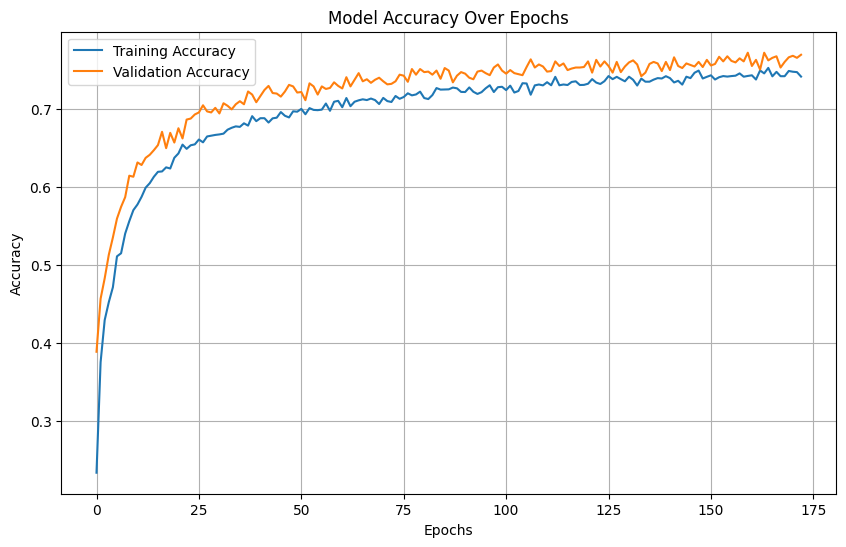

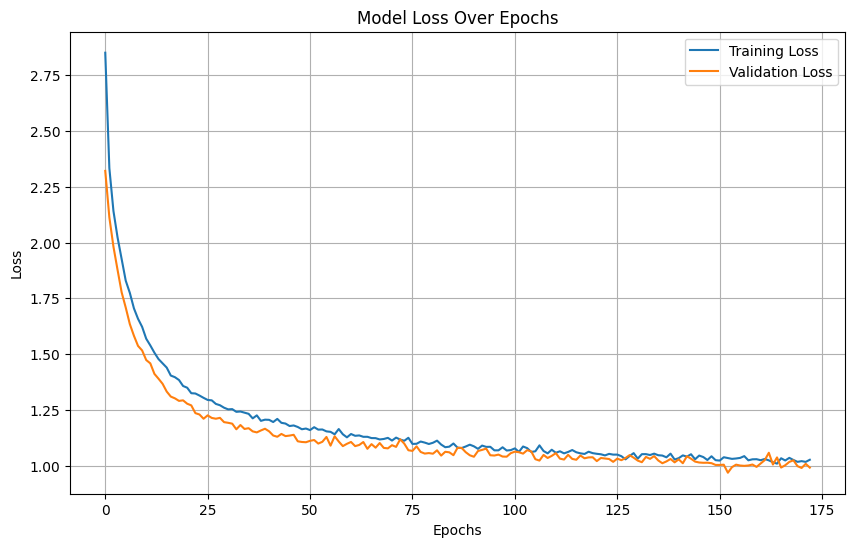

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
train_data = pd.read_excel("Training_Datasets.xlsx")
test_data = pd.read_excel("Testing_Datasets.xlsx")

# Feature Engineering
def preprocess_data_aligned(train_df, test_df):
    # Extract date components
    for df in [train_df, test_df]:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['DayOfWeek'] = df['Date'].dt.dayofweek

    # Transform textual features using TF-IDF
    tfidf = TfidfVectorizer(max_features=100)
    tfidf_train = tfidf.fit_transform(train_df['Noted'].fillna('')).toarray()
    tfidf_test = tfidf.transform(test_df['Noted'].fillna('')).toarray()

    tfidf_train_df = pd.DataFrame(tfidf_train, columns=[f"TFIDF_{i}" for i in range(tfidf_train.shape[1])])
    tfidf_test_df = pd.DataFrame(tfidf_test, columns=[f"TFIDF_{i}" for i in range(tfidf_test.shape[1])])

    # One-hot encode categorical columns
    categorical_train = pd.get_dummies(train_df[['Transaction Type', 'Payment Method']])
    categorical_test = pd.get_dummies(test_df[['Transaction Type', 'Payment Method']])

    # Align columns
    categorical_train, categorical_test = categorical_train.align(categorical_test, join='outer', axis=1, fill_value=0)

    # Combine features
    numerical_train = train_df[['Amount', 'Year', 'Month', 'DayOfWeek']]
    numerical_test = test_df[['Amount', 'Year', 'Month', 'DayOfWeek']]

    train_combined = pd.concat([numerical_train, categorical_train, tfidf_train_df], axis=1)
    test_combined = pd.concat([numerical_test, categorical_test, tfidf_test_df], axis=1)

    return train_combined, test_combined

# Preprocess training and testing datasets
X_train_full, X_test_full = preprocess_data_aligned(train_data, test_data)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Encode target variable
le_category = LabelEncoder()
y_train = le_category.fit_transform(train_data['Category'])
y_test = le_category.transform(test_data['Category'])

# Convert target to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Step 1: Add Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Step 2: Adjust Regularization
# Increase dropout rates and add L2 regularization
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),  # Increased dropout rate
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),  # Increased dropout rate
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(y_train_onehot.shape[1], activation='softmax')
])

# Step 3: Compile the model with the same optimizer and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Balance the Dataset
# Compute class weights to handle class imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Step 5: Simplify the Model Architecture (if necessary)
# This was done by not adding additional layers or complex structures.

# Step 6: Train the Model with Early Stopping and Class Weights
history = model.fit(
    X_train_scaled, y_train_onehot,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,  # Apply class weights
    callbacks=[early_stopping],  # Apply early stopping
    verbose=1
)

# Step 7: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_onehot, verbose=0)

# Print results
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 8: Plot Training and Validation Metrics
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()S
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# **Define**

Coba dulu

In [ ]:
'''
# Load the dataset
training_data = pd.read_excel("Training_Datasets.xlsx")

# Preprocessing: Encode categorical columns and scale numerical features
features = training_data.drop(columns=["Date", "Category", "Transaction ID", "Noted"])
target = training_data["Category"]

# Encode categorical features and target
encoder = LabelEncoder()
encoded_features = features.apply(lambda col: encoder.fit_transform(col) if col.dtypes == "object" else col)
encoded_target = encoder.fit_transform(target)

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_features)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, encoded_target, test_size=0.2, random_state=42)
'''

# Step 1: Load the Dataset
training_data = pd.read_excel("Balanced_Household_Transactiond.xlsx")

# Step 2: Flatten Subcategory and Category
training_data['Label'] = training_data['Category'] + " - " + training_data['Sub Category']

# Step 3: Data Preprocessing
# Select features and the new combined target
features = training_data.drop(columns=['Date', 'Category', 'Sub Category', 'Transaction ID', 'Noted', 'Label'])
target = training_data['Label']

# Encode categorical features and target
encoder = LabelEncoder()
encoded_features = features.apply(lambda col: encoder.fit_transform(col) if col.dtypes == 'object' else col)
encoded_target = encoder.fit_transform(target)

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_features)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, encoded_target, test_size=0.2, random_state=42)

# **Build Neural Network**

Coba Dulu

In [ ]:
# Define the neural network model
nn_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(32, activation="relu"),
    Dropout(0.4),
    Dense(16, activation="relu"),
    Dropout(0.4),
    Dense(len(encoder.classes_), activation="softmax")  # Output layer matches the number of classes
])

# Compile the model
nn_model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

nn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,610 (49.26 KB)

 Trainable params: 12,610 (49.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()
'''

"\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(32, activation='relu'),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(16, activation='relu'),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\n\nmodel.compile(\n    optimizer='adam',\n    loss='binary_crossentropy',\n    metrics=['accuracy']\n)\n\nmodel.summary()\n"

# **Training**

Coba Dulu

In [ ]:
'''
# Set accuracy threshold for early stopping
accuracy_threshold = 0.95  # Stop when validation accuracy reaches 95%
early_stopping_callback = CustomEarlyStopping(accuracy_threshold)

# Train the model with the custom early stopping callback
history = nn_model.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=1000,  # Maximum epochs
                       batch_size=32,
                       verbose=1,
                       callbacks=[early_stopping_callback])

# Evaluate the model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")
'''

# Define the learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,  # Reduce learning rate by half
    patience=5,  # Trigger after 5 epochs of no improvement
    min_lr=1e-6,  # Minimum learning rate
    verbose=1
)

# Set accuracy threshold for early stopping
accuracy_threshold = 0.95  # Stop when validation accuracy reaches 95%
early_stopping_callback = CustomEarlyStopping(accuracy_threshold)

# Train the model with early stopping and learning rate scheduler
history = nn_model.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=1000,  # Maximum epochs
                       batch_size=32,
                       verbose=1,
                       callbacks=[early_stopping_callback, lr_scheduler])

# Evaluate the model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/1000
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0443 - loss: 3.8349 - val_accuracy: 0.1723 - val_loss: 3.4257 - learning_rate: 0.0010
Epoch 2/1000
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1102 - loss: 3.4857 - val_accuracy: 0.2608 - val_loss: 3.0213 - learning_rate: 0.0010
Epoch 3/1000
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1731 - loss: 3.2321 - val_accuracy: 0.2724 - val_loss: 2.8344 - learning_rate: 0.0010
Epoch 4/1000
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2042 - loss: 3.0564 - val_accuracy: 0.3143 - val_loss: 2.6836 - learning_rate: 0.0010
Epoch 5/1000
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2302 - loss: 2.9944 - val_accuracy: 0.3149 - val_loss: 2.6121 - learning_rate: 0.0010
Epoch 6/1000
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2325 - loss: 2.8677 - val_accuracy: 0.3690 - val_loss: 2.5459 - learning_rate: 0.0010
Epoch 7/1000
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2693 - l

Coba Dulu

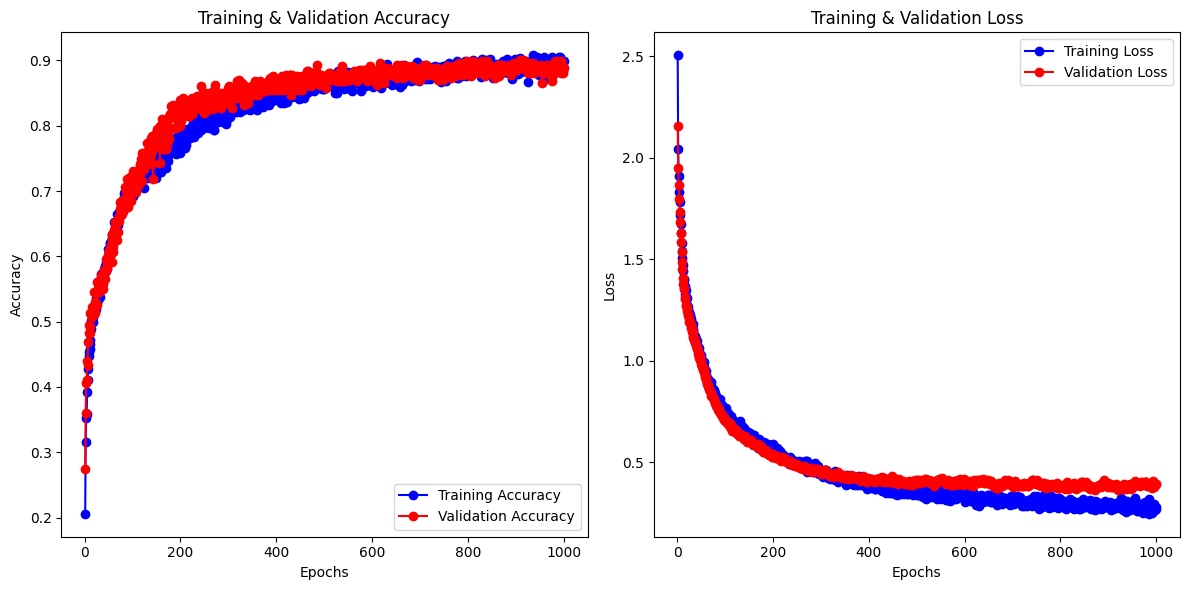

In [ ]:
'''
# After training, plot training & validation accuracy and loss
def plot_training_history(history):
    # Extract metrics from the history object
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)

    # Plot training & validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

# Call the function after training
plot_training_history(history)
'''

# Plot the training and validation accuracy and loss
def plot_training_history(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, "bo-", label="Training Accuracy")
    plt.plot(epochs, val_accuracy, "ro-", label="Validation Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, "bo-", label="Training Loss")
    plt.plot(epochs, val_loss, "ro-", label="Validation Loss")
    plt.title("Training & Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_training_history(history)

Train , evaluasi

In [ ]:
# history = model.fit(train_batches, epochs=10, validation_data=validation_batches)

# Save Model and Convert to TFLite

In [ ]:
# Save the model in HDF5 format
model_path = "optimized_neural_network_model_with_early_stopping.h5"
nn_model.save(model_path, save_format='tf')
print(f"Model saved at: {model_path}")

# Load the model from HDF5
loaded_model = tf.keras.models.load_model(model_path)

# Convert the loaded model to TensorFlow Lite
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = tflite_converter.convert()

# Save the TFLite model to a file
tflite_model_path = "optimized_neural_network_model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved at: {tflite_model_path}")

Model saved at: optimized_neural_network_model_with_early_stopping.h5


OSError: SavedModel file does not exist at: optimized_neural_network_model_with_early_stopping.h5/{saved_model.pbtxt|saved_model.pb}

# **TFLiteConverter**

In [ ]:
model.save('saved_model')
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
tflite_model = converter.convert()

with open('saved_model.tflite', 'wb') as f:
    f.write(tflite_model)

# **Download**